In [23]:
import numpy as np

from finquant.portfolio import *
from finquant.moving_average import compute_ma, ema

import quantstats as qs

import pandas as pd
import datetime

import yfinance as yf
import riskfolio.Portfolio as pf
import riskfolio.PlotFunctions as plf
import riskfolio.RiskFunctions as rf
import matplotlib as plt
import  statsmodels .api  as  sm 
from  sklearn.linear_model  import  LinearRegression
import  cvxpy  as  cv
from scipy.stats import norm

In [2]:
df_health = pd.read_csv('tick_score_health.csv')
df_tech = pd.read_csv('tick_score_tech.csv')
df_durable = pd.read_csv('tick_score_durable.csv')
df_nondurable = pd.read_csv('tick_score_nondurable.csv')
df_capital = pd.read_csv('tick_score_capital.csv')
df_transport = pd.read_csv('tick_score_transport.csv')
df_util = pd.read_csv('tick_score_util.csv')
df_services = pd.read_csv('tick_score_services.csv')
df_energy = pd.read_csv('tick_score_energy.csv')
df_finance = pd.read_csv('tick_score_finance.csv')
df_basics = pd.read_csv('tick_score_basics.csv')


frames = [df_finance, df_capital, df_durable, df_energy, df_health, df_nondurable, df_services, df_tech, df_services, df_util, df_basics]
df = pd.concat(frames)
df = df.drop_duplicates(subset=['Unnamed: 0'], keep='last')
df = df.set_index("Unnamed: 0")

percentile = np.percentile(df['Score'], 90)
mu, std = norm.fit(df['Score'])
roc = std / 3
aplus = df[df['Score'] > mu + (roc*4)]
#aplus = df[df['Score'] > mu + (roc*6)]
tickers = list(aplus.index)

In [3]:
start = "2016-01-01"
end = "2020-12-30"

In [4]:
pf = build_portfolio(names=tickers, start_date = start, end_date = end, data_api="yfinance", )

[*********************100%***********************]  48 of 48 completed


\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


                  Expected Return  Volatility  Sharpe Ratio
Min Volatility           0.154229    0.178150      0.837659
Max Sharpe Ratio         0.183592    0.195722      0.912476
                       MCO      SPGI       TRV       BEN       MTD       JHX  \
Min Volatility    0.013861  0.022859  0.002092  0.033023  0.014389  0.034578   
Max Sharpe Ratio  0.033368  0.046831  0.003502  0.022095  0.040275  0.032486   

                        BA       HON       CLX       KMB       DVN       OXY  \
Min Volatility    0.015335  0.044028  0.024017  0.031031  0.012945  0.000410   
Max Sharpe Ratio  0.015168  0.010468  0.028393  0.016015  0.020130  0.010071   

                       EOG      FANG       EMR       CMI       PSX      GILD  \
Min Volatility    0.009671  0.009027  0.001973  0.012242  0.008228  0.046883   
Max Sharpe Ratio  0.003599  0.004132  0.044332  0.039121  0.012993  0.005292   

                      ABBV       HCA       IQV      IDXX       BTI        PM  \
Min Volatility   

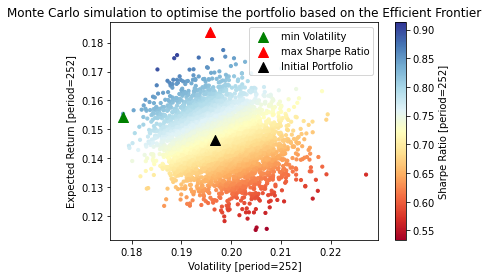

In [5]:
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)      # Monte Carlo weights and results
print(opt_res)                                            # Plot stats for optimals

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # Make pandas return whole df
    print(opt_w)

#plt.figure(figsize=(22,14))
pf.mc_plot_results()

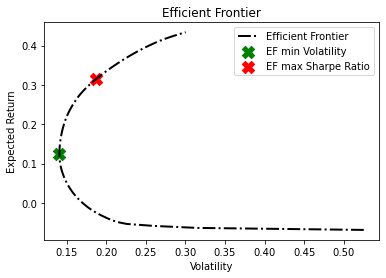

In [6]:
pf.ef_plot_efrontier()

pf.ef_plot_optimal_portfolios()

Name  Allocation
0    MCO    0.033368
1   SPGI    0.046831
2    TRV    0.003502
3    BEN    0.022095
4    MTD    0.040275
5    JHX    0.032486
6     BA    0.015168
7    HON    0.010468
8    CLX    0.028393
9    KMB    0.016015
10   DVN    0.020130
11   OXY    0.010071
12   EOG    0.003599
13  FANG    0.004132
14   EMR    0.044332
15   CMI    0.039121
16   PSX    0.012993
17  GILD    0.005292
18  ABBV    0.028745
19   HCA    0.032619
20   IQV    0.015282
21  IDXX    0.046117
22   BTI    0.016731
23    PM    0.007970
24  MDLZ    0.000354
25   DPZ    0.019276
26   DEO    0.021553
27   KDP    0.003597
28   PEP    0.045191
29    KO    0.024336
30    CL    0.015495
31    EL    0.001936
32  VRSN    0.010700
33   IHG    0.041974
34  BKNG    0.008075
35   AZO    0.032887
36   SPG    0.006254
37   YUM    0.035923
38   KEP    0.000476
39     D    0.021587
40   NGG    0.010845
41   LNG    0.017745
42   BCE    0.014088
43   LYB    0.016409
44   LIN    0.043421
45   APD    0.014772
46   IFF    0.013650
47   PPG    0.043721

[*********************100%***********************]  48 of 48 completed


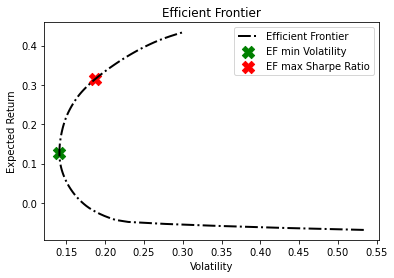

In [7]:
weights = pd.DataFrame(opt_w.loc["Max Sharpe Ratio"])
weights = weights.reset_index()
weights.columns = ["Name", "Allocation"]
display(weights)
pf2 = build_portfolio(names=tickers, start_date = start, end_date = end, data_api="yfinance", pf_allocation = weights)
pf2.ef_plot_efrontier()
pf2.ef_plot_optimal_portfolios()

In [8]:
data = yf.download(tickers, start = start, end = end, threads = False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%***********************]  48 of 48 completed


[*********************100%***********************]  4 of 4 completed


PRWAX    66.169272
SWPPX    83.268981
WFIVX    42.547109
^GSPC    85.179811
dtype: float64

PRWAX       SWPPX       WFIVX       ^GSPC
Date                                                      
2016-01-05   99.975533  100.193048  100.171335  100.201223
2016-01-06   99.021523   98.938224   98.914903   98.887044
2016-01-07   96.061642   96.589448   96.516273   96.543377
2016-01-08   95.009783   95.527672   95.431176   95.497004
2016-01-11   94.863008   95.624194   95.431176   95.578489
...                ...         ...         ...         ...
2020-12-22  164.995096  181.306302  143.061102  183.203320
2020-12-23  165.092945  181.435005  143.232436  183.339955
2020-12-24  165.166328  182.110678  143.632206  183.988354
2020-12-28  166.071423  183.687260  144.545969  185.593197
2020-12-29  166.169272  183.268981  142.547109  185.179811

[1256 rows x 4 columns]

Date
2016-01-05    100.287125
2016-01-06     98.782532
2016-01-07     96.100753
2016-01-08     95.255359
2016-01-11     94.963949
                 ...    
2020-12-22    182.808791
2020-12-23    184.569336
2020-12-24    184.992546
2020-12-28    185.518198
2020-12-29    185.302224
Length: 1256, dtype: float64


<AxesSubplot:xlabel='Date'>

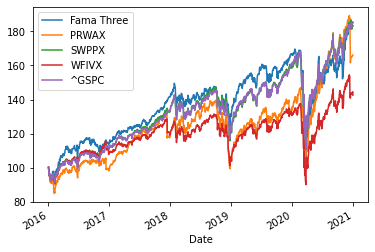

In [10]:
comparisons = ["^GSPC", "WFIVX", "PRWAX", "SWPPX"]
sp_500 = yf.download(tickers=comparisons, start=start, end=end, threads = False)
sp_500 = sp_500.loc[:,('Close')]
sp_500_total_cum_return = ((sp_500.iloc[-1] - sp_500.iloc[0]) / sp_500.iloc[0])*100
display(sp_500_total_cum_return)
sp_500_daily = sp_500.pct_change().fillna(100)[1:]
compare_port = (sp_500_daily + 1).cumprod()
compare_port *= 100
compare_port = pd.DataFrame(compare_port)
display(compare_port)

Y_cum = data[tickers].pct_change().fillna(0)[1:]
weights = weights.set_index("Name")    
for tick in weights.index:
    Y_cum.loc[:,tick] *= weights.loc[tick].values
port_ret = Y_cum.sum(axis=1)
Y_cum_ret = (port_ret + 1).cumprod()
Y_cum_ret *= 100
print(Y_cum_ret)



pfcr = pd.DataFrame(Y_cum_ret)
pfcr.columns = ["Fama Three"]
newdf = pfcr.join(compare_port)

newdf.plot()

                    Strategy
------------------  ----------
Start Period        2016-01-05
End Period          2020-12-29
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   85.3%
CAGR%               13.17%

Sharpe              0.72
Sortino             0.99
Sortino/√2          0.7

Max Drawdown        -39.87%
Longest DD Days     408

Gain/Pain Ratio     0.16
Gain/Pain (1M)      1.06

Payoff Ratio        0.95
Profit Factor       1.16
Common Sense Ratio  1.08
CPC Index           0.61
Tail Ratio          0.93
Outlier Win Ratio   4.84
Outlier Loss Ratio  4.49

MTD                 3.97%
3M                  19.69%
6M                  26.0%
YTD                 11.2%
1Y                  11.02%
3Y (ann.)           9.33%
5Y (ann.)           13.17%
10Y (ann.)          13.17%
All-time (ann.)     13.17%

Avg. Drawdown       -2.0%
Avg. Drawdown Days  22
Recovery Factor     2.14
Ulcer Index         1.1


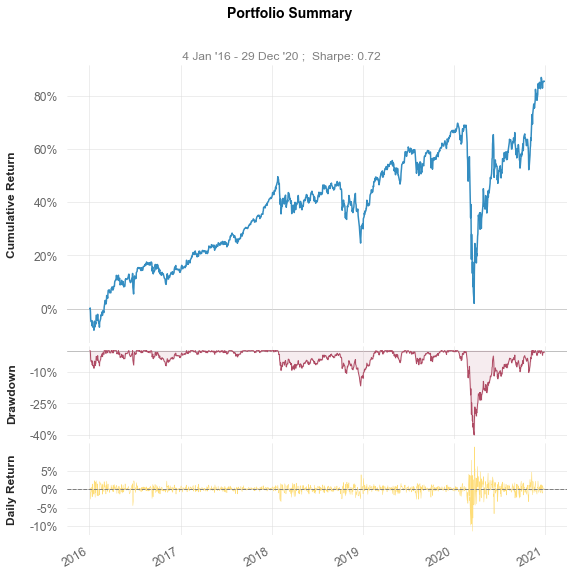

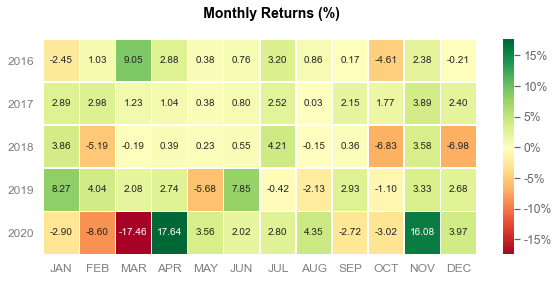

In [24]:
qs.reports.basic(port_ret)
#pfdr = pf2.comp_daily_returns()
#display(pfdr)
#pfdr.dot(weights.T)
#display(pfdr)
#pfdr.plot()

In [12]:
#display(pf2.properties())
#display(pf2.comp_expected_return(freq=252*5))

0.9237326902095991

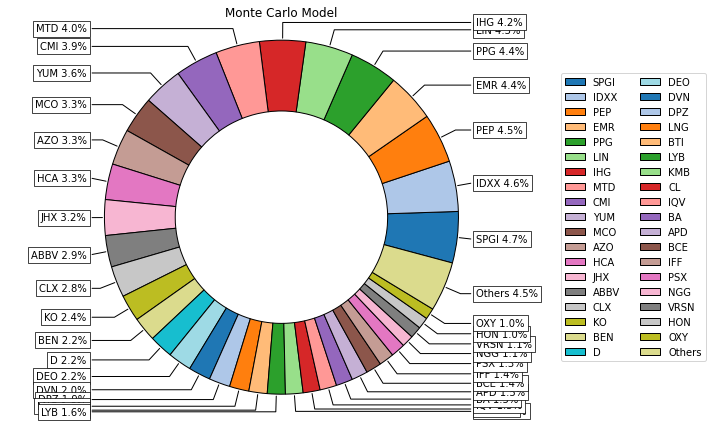

In [13]:
#weights = weights.set_index("Name")
ax = plf.plot_pie(w=weights, title='Monte Carlo Model', others=0.05, nrow = 25, cmap = "tab20", height=6, width=10, ax=None)

\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
\\userFS\joa512\w2k\Applications\Python\Python38\site-packages\riskfolio\RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)


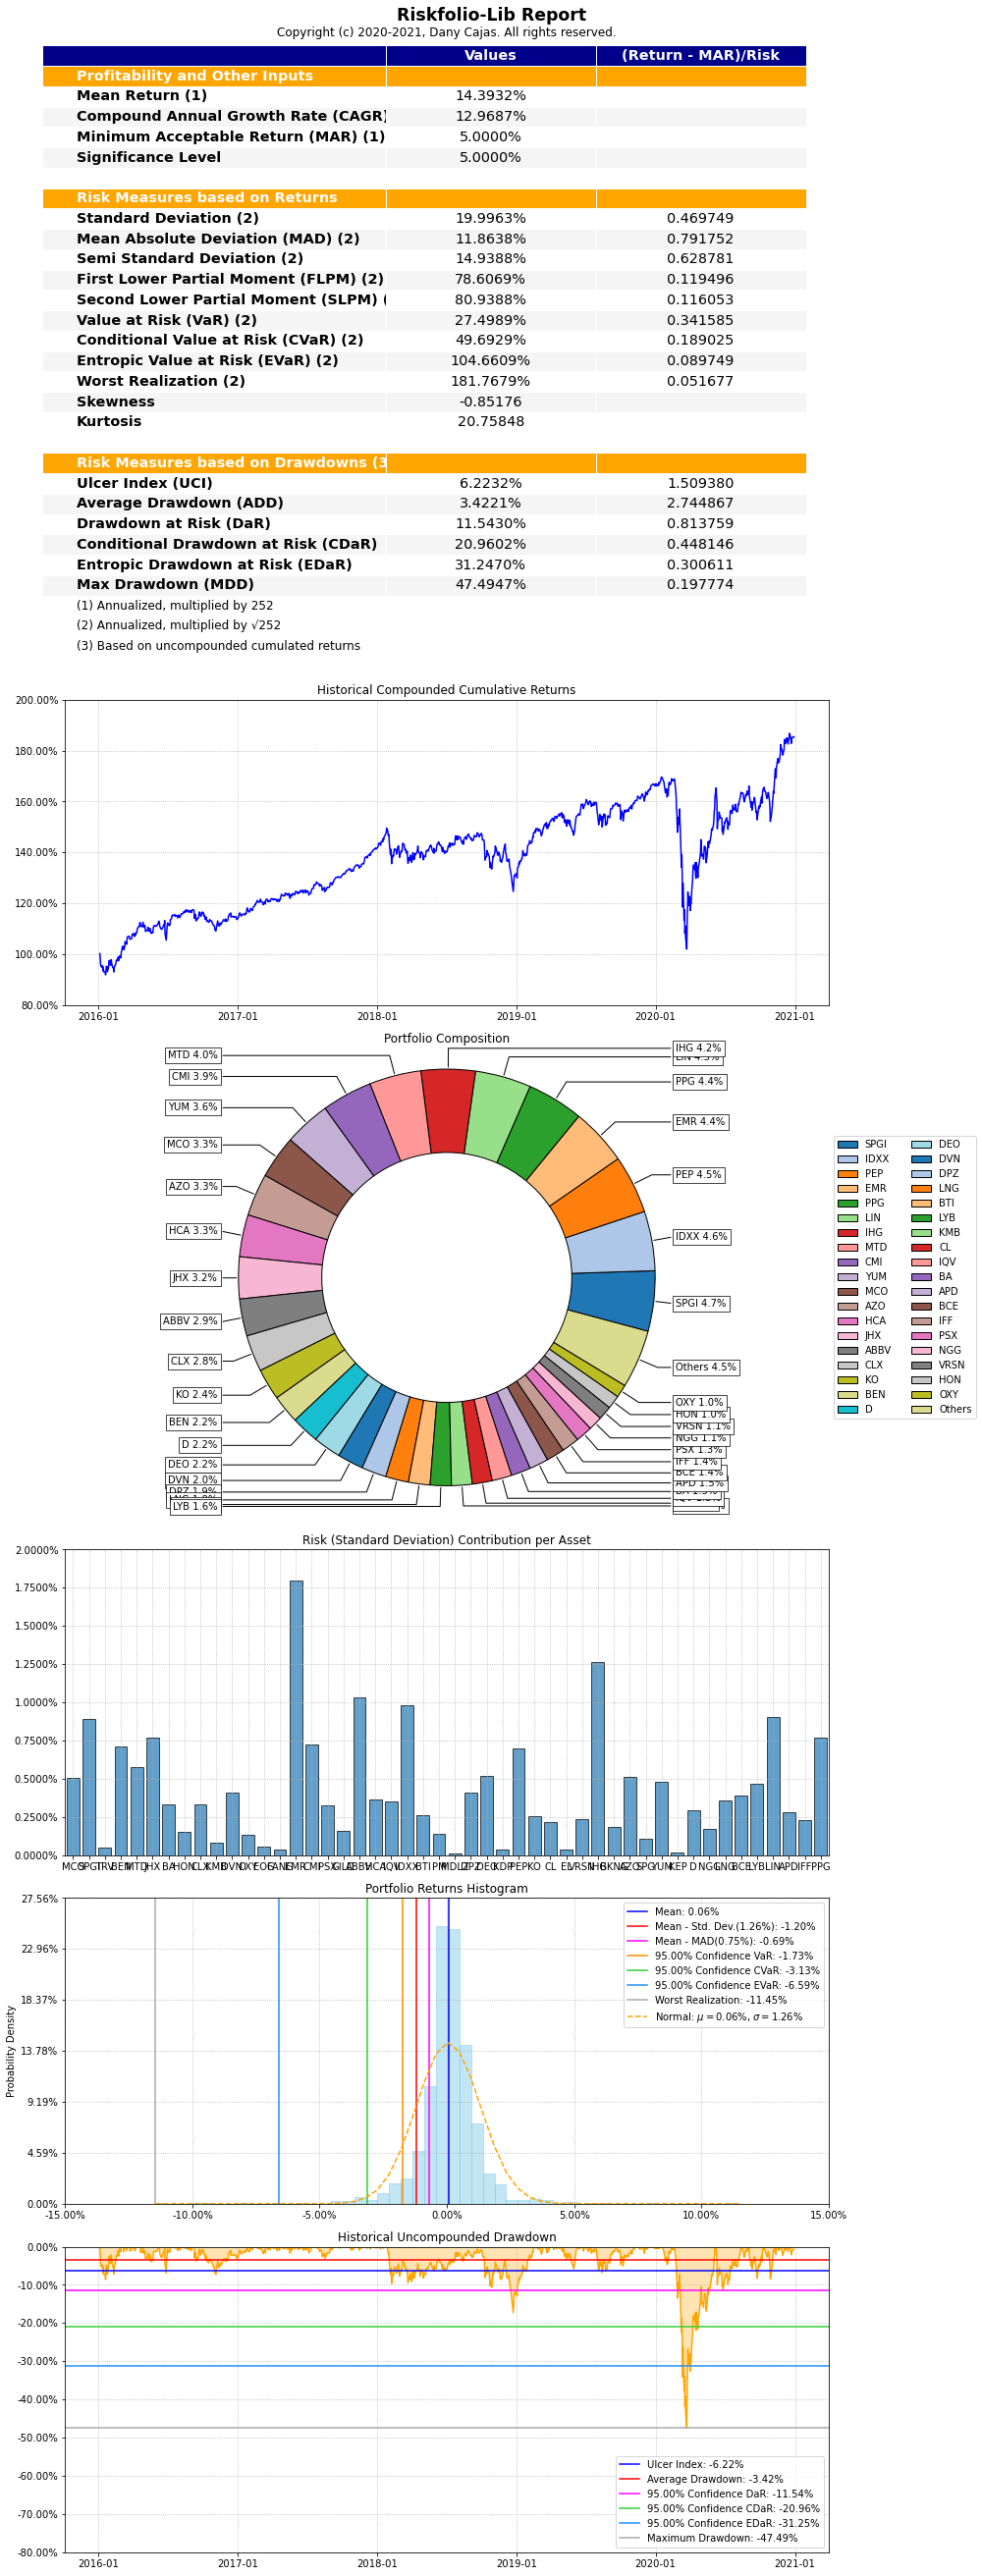

In [14]:
import riskfolio.Reports as rp
port_diff = data[tickers].pct_change().dropna()

ax_report = rp.jupyter_report(port_diff, w=weights, rm='MV', rf=0.05, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)

In [15]:
#display(weights)
data = yf.download(list(weights.index), start = start, end = end, threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values
    
data = data.mean(axis=1)
port_diff = pd.DataFrame(data.pct_change().dropna())
port_diff.columns = ["Close"]
avg_daily_return = port_diff.mean()["Close"]
std_dev_daily_return = port_diff.std()["Close"]


[*********************100%***********************]  48 of 48 completed


In [16]:
# Set number of trading days and get last closing price of TSLA from DataFrame
num_simulations = 1000
num_trading_days = 60 
stock_last_price = port_diff['Close'][-1]
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):
    # Initialize the simulated prices list with the last closing price of TSLA
    simulated_ticker_prices = [stock_last_price]

        # Simulate the returns for 252  trading days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price = simulated_ticker_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        # Append the simulated price to the list
        simulated_ticker_prices.append(simulated_price)
    
    # Append the simulated prices of each simulation to DataFrame
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_ticker_prices)



<AxesSubplot:title={'center':'1000 Simulations of Portfolio Stock Price Trajectory Over the Next 60 Trading Days'}>

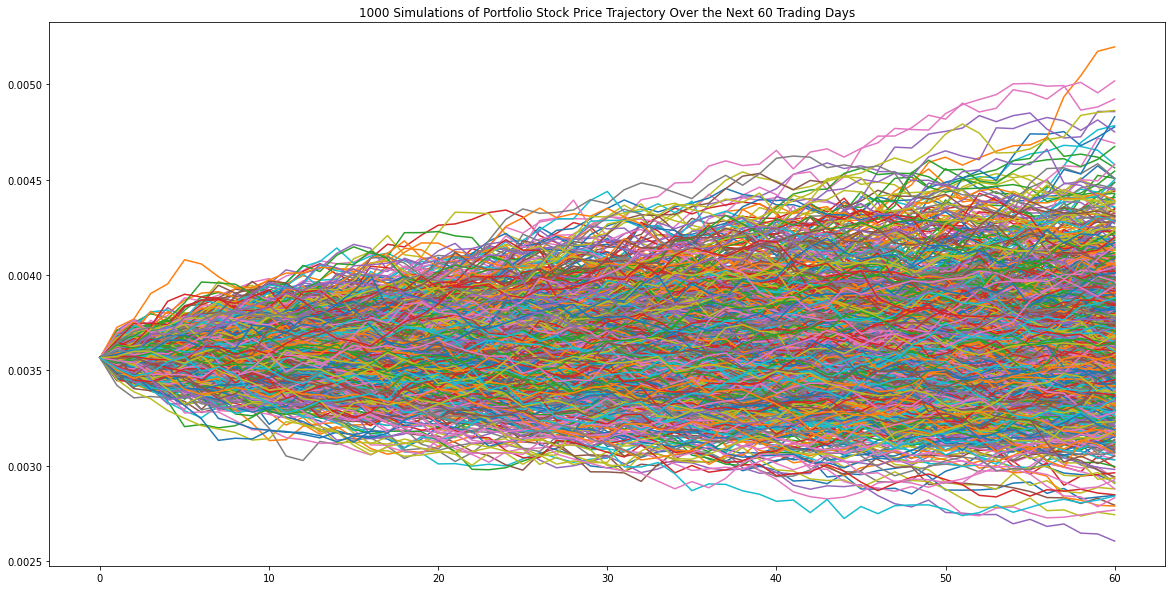

In [17]:
plot_title = f"{n+1} Simulations of Portfolio Stock Price Trajectory Over the Next 60 Trading Days"
simulated_price_df.plot(legend=None, title=plot_title, figsize =[20,10])

In [18]:
simulated_ending_prices = simulated_price_df.iloc[-1, :]

In [19]:
# Use the `value_counts` function to create the frequency distribution and 
# sort the data into 20 bins. Divide the value counts of each bin by the total
# number of prices to return the probability of each range
simulated_ending_prices.value_counts(bins=20) / len(simulated_ending_prices)

(0.00364, 0.00377]                  0.151
(0.00338, 0.00351]                  0.147
(0.00351, 0.00364]                  0.138
(0.00377, 0.0039]                   0.121
(0.00325, 0.00338]                  0.093
(0.0039, 0.00403]                   0.088
(0.00312, 0.00325]                  0.061
(0.00403, 0.00416]                  0.058
(0.00416, 0.00429]                  0.035
(0.00429, 0.00442]                  0.030
(0.00299, 0.00312]                  0.029
(0.00442, 0.00455]                  0.014
(0.00286, 0.00299]                  0.012
(0.00273, 0.00286]                  0.008
(0.00455, 0.00468]                  0.004
(0.00468, 0.00481]                  0.004
(0.00481, 0.00494]                  0.004
(0.00507, 0.0052]                   0.001
(0.00494, 0.00507]                  0.001
(0.0015999999999999999, 0.00273]    0.001
Name: 60, dtype: float64

In [20]:
import matplotlib.pyplot as pyplt

[*********************100%***********************]  48 of 48 completed
[*********************100%***********************]  48 of 48 completed


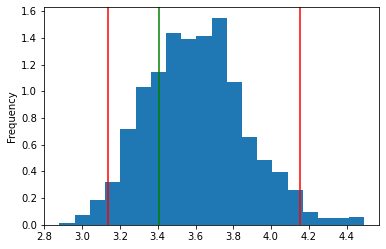

In [21]:
data = yf.download(list(weights.index), start = start, end = end, threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values
    
data = pd.DataFrame(data.mean(axis=1))
data.columns = ["Close"]
port_diff = pd.DataFrame(data.pct_change().dropna())
port_diff.columns = ["Close"]
avg_daily_return = port_diff.mean()["Close"]
std_dev_daily_return = port_diff.std()["Close"]


# Set number of trading days and get last closing price of TSLA from DataFrame
num_simulations = 1000
num_trading_days = 32
stock_last_price = data['Close'][-1]
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):
    simulated_ticker_prices = [stock_last_price]

    for i in range(num_trading_days):
        simulated_price = simulated_ticker_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        simulated_ticker_prices.append(simulated_price)
    
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_ticker_prices)


simulated_ending_prices = simulated_price_df.iloc[-1, :]
simulated_ending_prices.value_counts(bins=20) / len(simulated_ending_prices)
confidence_interval = simulated_ending_prices.quantile(q=[0.025, 0.975])

data = yf.download(list(weights.index), start = "2021-01-28", end = "2021-01-30", threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values

data = data.mean(axis=1)
port_diff = pd.DataFrame(data.pct_change().dropna())
actual_price = data.iloc[-1]

simulated_ending_prices.plot(kind='hist', density=True, bins=20)
pyplt.axvline(confidence_interval.iloc[0], color='r')
pyplt.axvline(confidence_interval.iloc[1], color='r')
pyplt.axvline(actual_price, color='g')

[*********************100%***********************]  48 of 48 completed
[*********************100%***********************]  48 of 48 completed


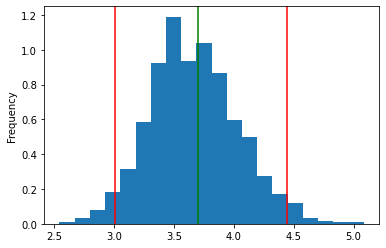

In [22]:
data = yf.download(list(weights.index), start = start, end = end, threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values
    
data = pd.DataFrame(data.mean(axis=1))
data.columns = ["Close"]
port_diff = pd.DataFrame(data.pct_change().dropna())
port_diff.columns = ["Close"]
avg_daily_return = port_diff.mean()["Close"]
std_dev_daily_return = port_diff.std()["Close"]


# Set number of trading days and get last closing price of TSLA from DataFrame
num_simulations = 1000
num_trading_days = 60
stock_last_price = data['Close'][-1]
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):
    simulated_ticker_prices = [stock_last_price]

    for i in range(num_trading_days):
        simulated_price = simulated_ticker_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        simulated_ticker_prices.append(simulated_price)
    
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_ticker_prices)


simulated_ending_prices = simulated_price_df.iloc[-1, :]
simulated_ending_prices.value_counts(bins=20) / len(simulated_ending_prices)
confidence_interval = simulated_ending_prices.quantile(q=[0.025, 0.975])

data = yf.download(list(weights.index), start = "2021-03-22", end = "2021-03-24", threads = False)
data = data.loc[:,('Close', slice(None))]
data.columns = list(weights.index)

for col in data.columns:
    data.loc[:,col] *= weights.loc[col].values

data = data.mean(axis=1)
port_diff = pd.DataFrame(data.pct_change().dropna())
actual_price = data.iloc[-1]

simulated_ending_prices.plot(kind='hist', density=True, bins=20)
pyplt.axvline(confidence_interval.iloc[0], color='r')
pyplt.axvline(confidence_interval.iloc[1], color='r')
pyplt.axvline(actual_price, color='g')